# Data Visualization

##Matplotlib and Seaborn

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

Third party packages


A large number of third party packages extend and build on Matplotlib functionality, including several higher-
level plotting interfaces (seaborn, holoviews, ggplot, ...), and two projection and mapping toolkits (basemap
and cartopy).

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure,
plots some lines in a plotting area, decorates the plot with labels, etc.
In matplotlib.

pyplot various states are preserved across function calls, so that it keeps track of things like the
current figure and plotting area, and the plotting functions are directed to the current axes (please note that
"axes" here and in most places in the documentation refers to the axes part of a figure and not the strict
mathematical term for more than one axis)

##imports 

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

#Plot a Point

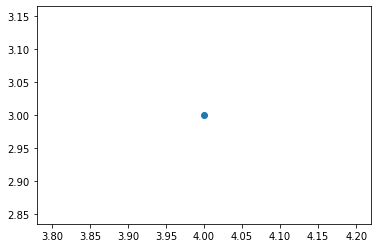

In [30]:
plt.plot(4,3,'o')

#Plot Multiple Points

Text(0, 0.5, 'Y-Axis')

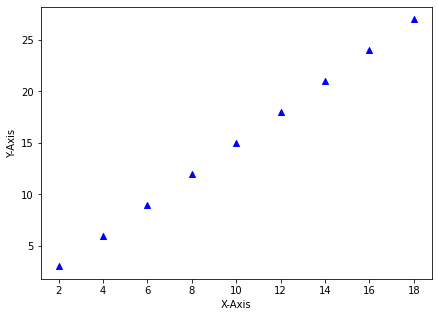

In [31]:
x = np.arange(2,20,2)
y= np.arange(3,30,3)
plt.figure(figsize=(7,5))
plt.scatter(x,y,c='blue',marker='^')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

#Plotting Multiple Graphs

> subplot(NumberOfRows NumberOfColumns CurrentPlot)

Text(0.5, 0.98, 'Categorical Plotting')

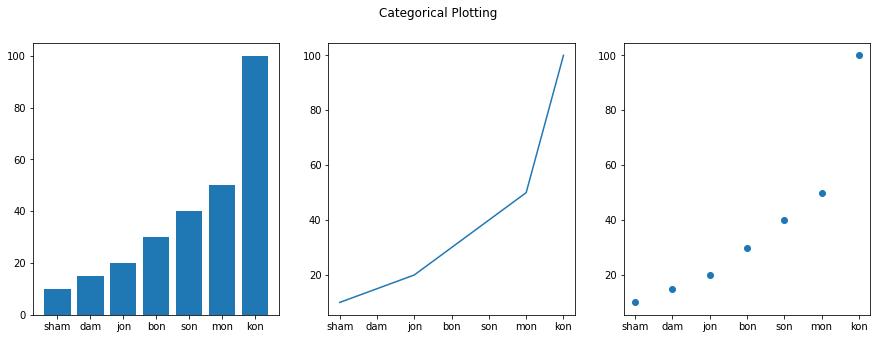

In [32]:
names = ['sham', 'dam', 'jon','bon','son','mon','kon']
scores = [10,15,20,30,40,50, 100]

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.bar(names,scores)

plt.subplot(132)
plt.plot(names,scores)

plt.subplot(133)
plt.scatter(names,scores)

plt.suptitle('Categorical Plotting')



##Explicitly Setting X and Y Axis Ranges

Text(0, 0.5, 'y-axis')

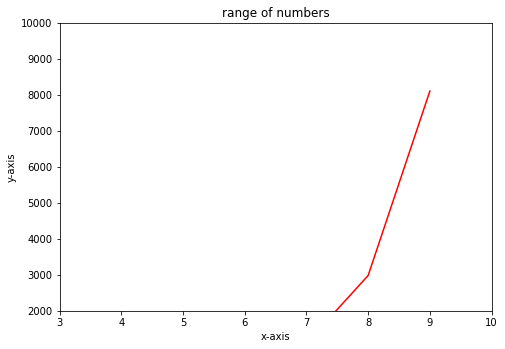

In [33]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1]) #The calling signature of add_axes is add_axes(rect), where rect is a list [x0, y0, width, height] denoting the lower left point of the new axes in figure coodinates (x0,y0) and its width and height. So the axes is positionned in absolute coordinates on the canvas 
x = np.arange(1,10)
a1.plot(x, np.exp(x),'r')
a1.set_title('range of numbers')
plt.ylim(2000,10000)
plt.xlim(3,10) 
#explicitly set x and y labels
plt.xlabel("x-axis")  
plt.ylabel('y-axis')

#SeaBorn 

Seaborn comes with a large number of high-level interfaces and customized themes that matplotlib lacks as it becomes difficult to figure out the settings that make plots attractive.

Mostly, matplotlib functions don’t work well with dataframes as seaborn does

In [34]:
import seaborn as sns

##Pokemon Dataset


In [35]:
data=pd.read_csv("/content/Pokedex.csv")

In [36]:
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


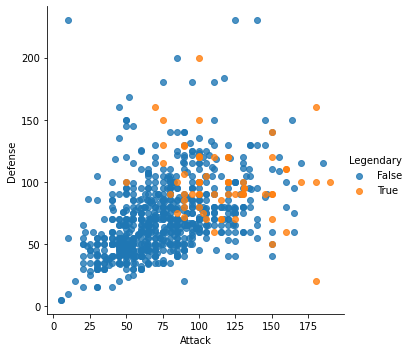

In [37]:
sns.lmplot(x='Attack',y='Defense',data=data,hue='Legendary',fit_reg=False)

#lmplot() function is used to quickly plot the Linear Relationship between two(2) variables. 
#lm for linear regression model
#Setting fit_reg=False to remove the regression line
#Default lm plot fits regression line

In [38]:
data['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

#Box Plot

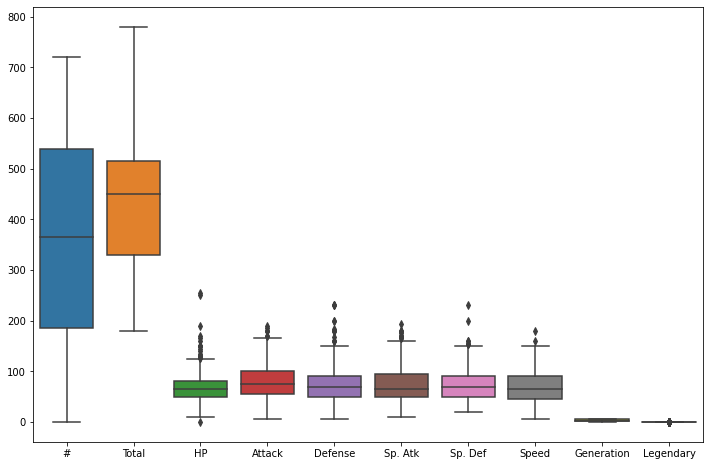

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [40]:
modData= data.drop(['Generation','Legendary','#','Total'],axis=1)

In [41]:
modData.head(3)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80


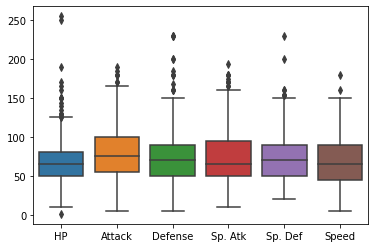

In [42]:
sns.boxplot(data=modData)

In [43]:
modData.corr()
#Correlation between two features in dataset

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


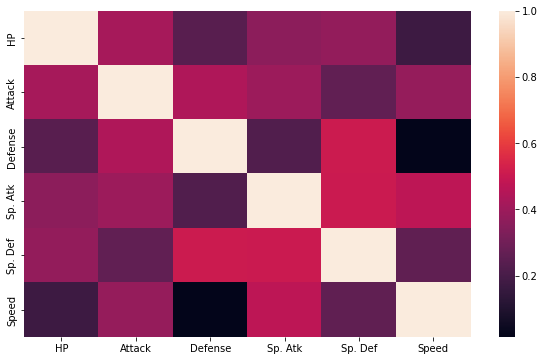

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(modData.corr())

#Univariate Visualization

##Dist Plot

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function.

By default, this will draw a histogram and fit a kernel density estimate (KDE). It is used basically for univariant
set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one
particular column of the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


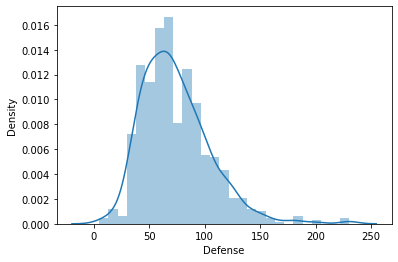

In [45]:
sns.distplot(modData['Defense'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


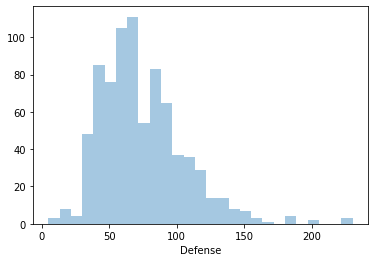

In [46]:
sns.distplot(modData['Defense'], kde=False)

> We can Plot KDE separately using kdeplot

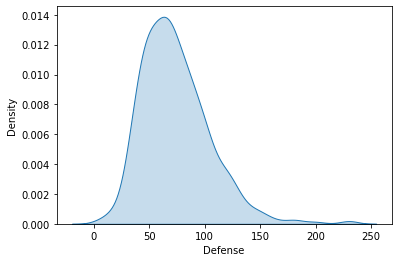

In [47]:
sns.kdeplot(modData['Defense'], shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


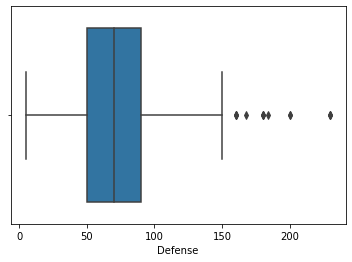

In [48]:
sns.boxplot(modData['Defense'])

#Bi-Variate Distributions

In [49]:
modData.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')

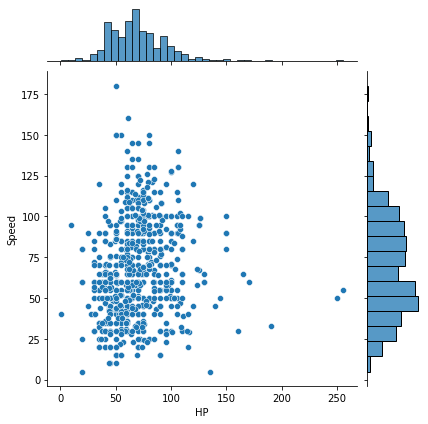

In [50]:
sns.jointplot(x='HP',y='Speed',data=modData)

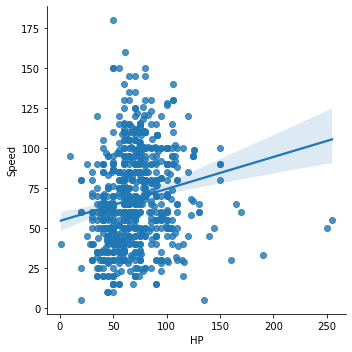

In [51]:
sns.lmplot(x='HP',y='Speed',data=modData)

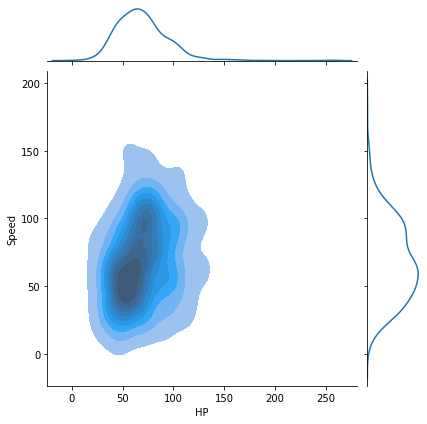

In [52]:
sns.jointplot(x='HP',y='Speed',data=modData,kind='kde',shade=True)

#kind can be "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 

#Visaulising more than two variables


##Pairwise Bivariate Distributions-Using Pairplot()

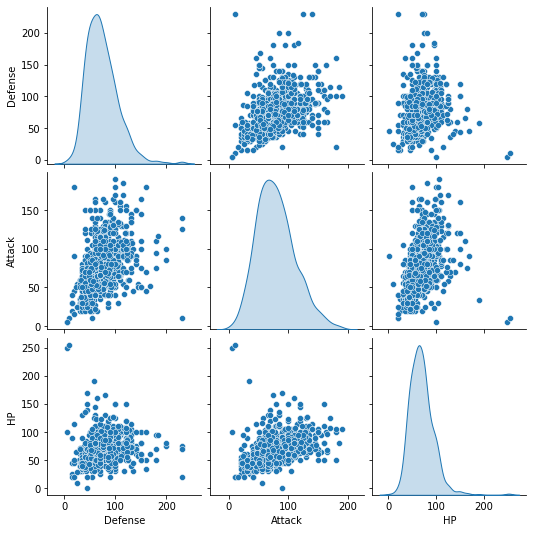

In [53]:
sns.pairplot(modData[['Defense','Attack','HP']],diag_kind='kde',kind='scatter')

#Categorical Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


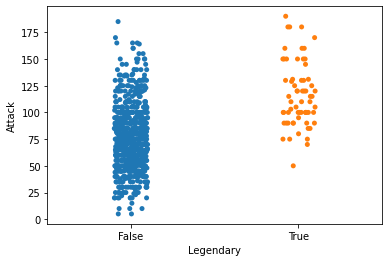

In [54]:
sns.stripplot(data['Legendary'], data['Attack'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


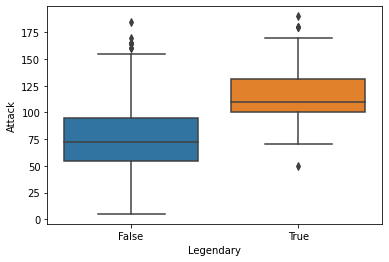

In [55]:
sns.boxplot(data['Legendary'], data['Attack'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


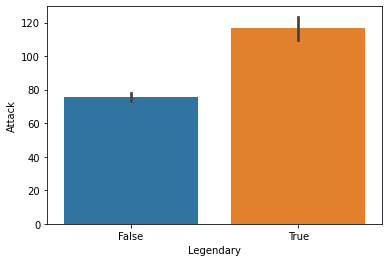

In [56]:
sns.barplot(data['Legendary'], data['Attack'])

[Learn More About Starting with Seaborn]( https://seaborn.pydata.org/introduction.html)

#Practise 

Using the data, plot the following visualizations using seaborn:

1. lmplot using lmplot()

2. Boxplot

3. Distplot with kde=False and kde=True

4. Pair-plot with a summary explanation

In [57]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

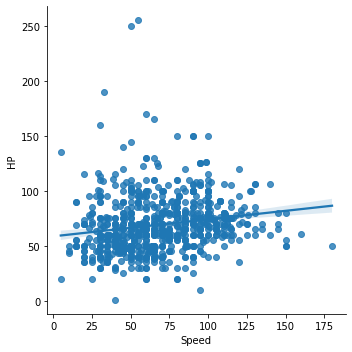

In [59]:
sns.lmplot(x='Speed',y='HP',data=data,)

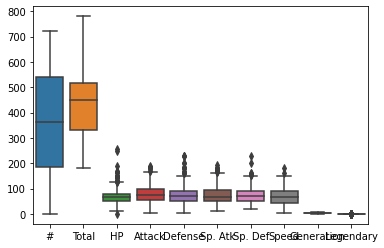

In [61]:
sns.boxplot(data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


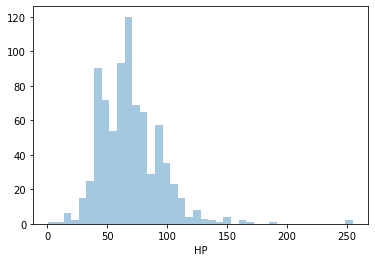

In [64]:
sns.distplot(data['HP'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


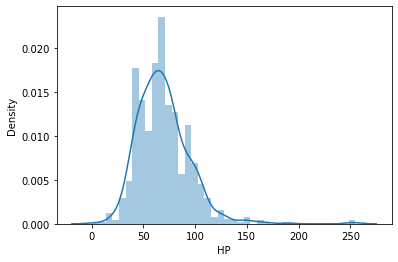

In [66]:
sns.distplot(data['HP'],kde=True)

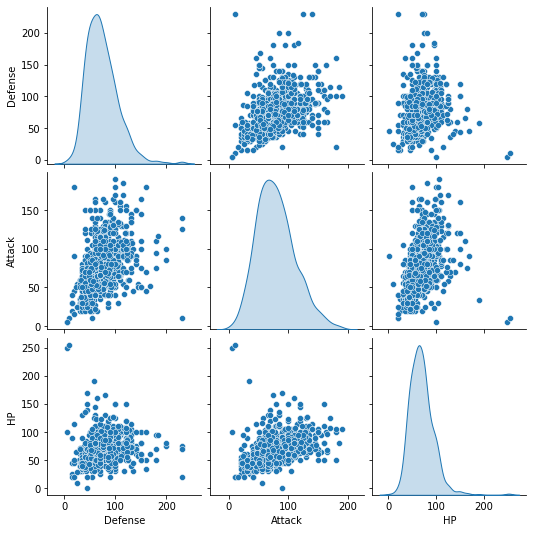

In [69]:
sns.pairplot(data[['Defense','Attack','HP']],diag_kind='kde')